In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
url="https://raw.githubusercontent.com/Anjoomnur0901/Data-Science-and-Machine-Learning/master/Decision%20Tree/hepatitis.csv"

In [3]:
df= pd.read_csv(url)

In [4]:
df

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,1,46,1,2.0,2,1,1,1,2.0,2.0,2.0,1.0,1.0,1.0,7.6,NaN,242.0,3.3,50.0,2
150,0,44,1,2.0,2,1,2,2,2.0,1.0,2.0,2.0,2.0,2.0,0.9,126.0,142.0,4.3,NaN,2
151,0,61,1,1.0,2,1,1,2,1.0,1.0,2.0,1.0,2.0,2.0,0.8,75.0,20.0,4.1,NaN,2
152,0,53,2,1.0,2,1,2,2,2.0,2.0,1.0,1.0,2.0,1.0,1.5,81.0,19.0,4.1,48.0,2


In [5]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.0,18.0,4.0,NaN,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.0,42.0,3.5,NaN,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.0,32.0,4.0,NaN,1
3,0,31,1,NaN,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.0,52.0,4.0,80.0,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,NaN,200.0,4.0,NaN,1


In [6]:
#Search for NaN values
df.isna().sum()

Class               0
AGE                 0
SEX                 0
STEROID             1
ANTIVIRALS          0
FATIGUE             0
MALAISE             0
ANOREXIA            0
LIVER BIG           9
LIVER FIRM         10
SPLEEN PALPABLE     4
SPIDERS             4
ASCITES             4
VARICES             4
BILIRUBIN           5
ALK PHOSPHATE      28
SGOT                3
ALBUMIN            15
PROTIME            66
HISTOLOGY           0
dtype: int64

In [7]:
#The df.nunique() function in pandas is used to count the number of unique values for each column in a DataFrame.
df.nunique()

Class               2
AGE                49
SEX                 2
STEROID             2
ANTIVIRALS          2
FATIGUE             2
MALAISE             2
ANOREXIA            2
LIVER BIG           2
LIVER FIRM          2
SPLEEN PALPABLE     2
SPIDERS             2
ASCITES             2
VARICES             2
BILIRUBIN          34
ALK PHOSPHATE      83
SGOT               84
ALBUMIN            29
PROTIME            44
HISTOLOGY           2
dtype: int64

<p>Here Age, Bilirubin, Alk phosphate, sgot, Albumin, Protime are numerical columns.So we do Mean Imputation for Numerical Columns</p><br>
<p>other columns have 2 unique values so we do Mode Imputation for Binary/Categorical Columns</p><br>
<h2>Example for understanding:</h2>
<p>Consider a dataset with a column "Age" (numerical) and a column "Gender" (binary categorical).<br>

If <b>"Age"</b> has some missing values, imputing the mean age helps to fill in those gaps without drastically altering the overall age distribution.<br>
If <b>"Gender"</b> has some missing values, imputing the mode (most common gender) helps to fill in those gaps without introducing a new category or significantly altering the gender distribution.</p>

In [8]:
df.dtypes

Class                int64
AGE                  int64
SEX                  int64
STEROID            float64
ANTIVIRALS           int64
FATIGUE              int64
MALAISE              int64
ANOREXIA             int64
LIVER BIG          float64
LIVER FIRM         float64
SPLEEN PALPABLE    float64
SPIDERS            float64
ASCITES            float64
VARICES            float64
BILIRUBIN          float64
ALK PHOSPHATE      float64
SGOT               float64
ALBUMIN            float64
PROTIME            float64
HISTOLOGY            int64
dtype: object

<h2><b>Handling columns with more than 2 unique values and null values:</b></h2>
Fill null values with the mean of the column.
<h2><b>Handling columns with exactly 2 unique values and null values:</b></h2>
Fill null values with the mode (most frequent value) of the column.

In [9]:
# Separating name of columns with categorical and null values

#Handling null values

for col_name in df.columns:
    if df[col_name].nunique() > 2 and df[col_name].isna().sum() > 0:
        df[col_name].fillna(df[col_name].mean(),inplace = True)

    elif df[col_name].nunique() == 2 and df[col_name].isna().sum() > 0:
        df[col_name].fillna(df[col_name].mode().iloc[0], inplace = True)

In [10]:
df.isna().sum()

Class              0
AGE                0
SEX                0
STEROID            0
ANTIVIRALS         0
FATIGUE            0
MALAISE            0
ANOREXIA           0
LIVER BIG          0
LIVER FIRM         0
SPLEEN PALPABLE    0
SPIDERS            0
ASCITES            0
VARICES            0
BILIRUBIN          0
ALK PHOSPHATE      0
SGOT               0
ALBUMIN            0
PROTIME            0
HISTOLOGY          0
dtype: int64

In [11]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,30,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,1.0,85.000000,18.0,4.0,61.852273,1
1,0,50,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.9,135.000000,42.0,3.5,61.852273,1
2,0,78,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,96.000000,32.0,4.0,61.852273,1
3,0,31,1,2.0,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.7,46.000000,52.0,4.0,80.000000,1
4,0,34,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,1.0,105.325397,200.0,4.0,61.852273,1


<h1>Scaling</h1>

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
for col_name in df.columns:
    if df[col_name].nunique() > 2:
        df[col_name] = scaler.fit_transform(df[[col_name]])

In [15]:
df.head()

,Class,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER BIG,LIVER FIRM,SPLEEN PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY
0,0,0.323944,2,1.0,2,2,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.090909,0.219331,0.006309,0.441860,0.618523,1
1,0,0.605634,1,1.0,2,1,2,2,1.0,2.0,2.0,2.0,2.0,2.0,0.077922,0.405204,0.044164,0.325581,0.618523,1
2,0,1.000000,1,2.0,2,1,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.051948,0.260223,0.028391,0.441860,0.618523,1
3,0,0.338028,1,2.0,1,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.051948,0.074349,0.059937,0.441860,0.800000,1
4,0,0.380282,1,2.0,2,2,2,2,2.0,2.0,2.0,2.0,2.0,2.0,0.090909,0.294890,0.293375,0.441860,0.618523,1


<Axes: xlabel='SEX', ylabel='count'>

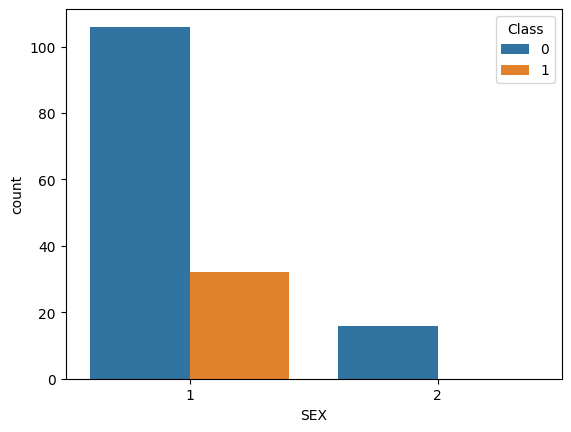

In [17]:
sns.countplot(x="SEX",data=df,hue="Class")

<Axes: xlabel='ANTIVIRALS', ylabel='count'>

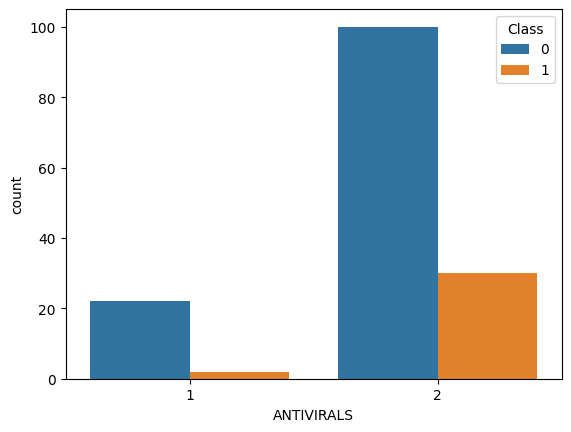

In [18]:
sns.countplot(x="ANTIVIRALS",data=df,hue="Class")


<Axes: xlabel='FATIGUE', ylabel='count'>

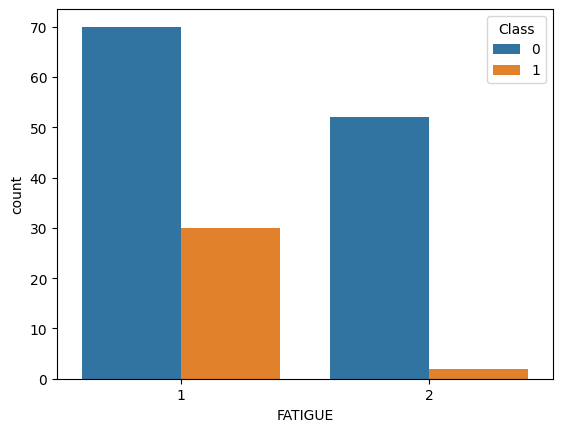

In [19]:
sns.countplot(x="FATIGUE",data=df,hue="Class")

<Axes: xlabel='MALAISE', ylabel='count'>

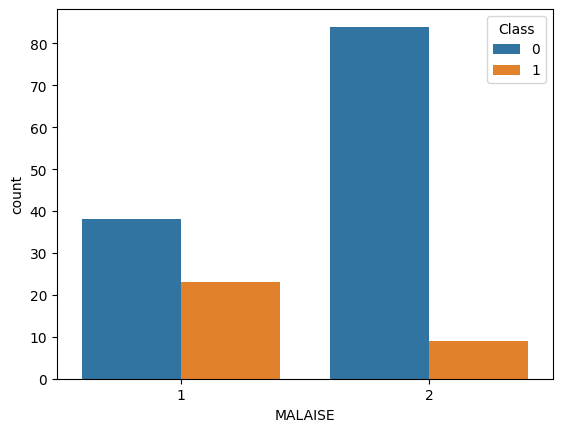

In [20]:
sns.countplot(x="MALAISE",data=df,hue="Class")

<Axes: xlabel='ANOREXIA', ylabel='count'>

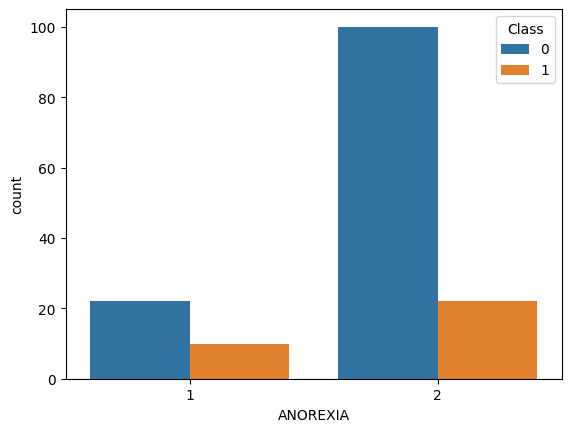

In [21]:
sns.countplot(x="ANOREXIA",data=df,hue="Class")

<h2>Split</h2>

In [22]:
X = df.drop(["Class"],axis = 1)
y = df["Class"]

In [23]:
y

0      0
1      0
2      0
3      0
4      0
      ..
149    1
150    0
151    0
152    0
153    1
Name: Class, Length: 154, dtype: int64

<h1>Train Test Split</h1>

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 42)

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt = DecisionTreeClassifier()

In [28]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [29]:
from sklearn.tree import plot_tree

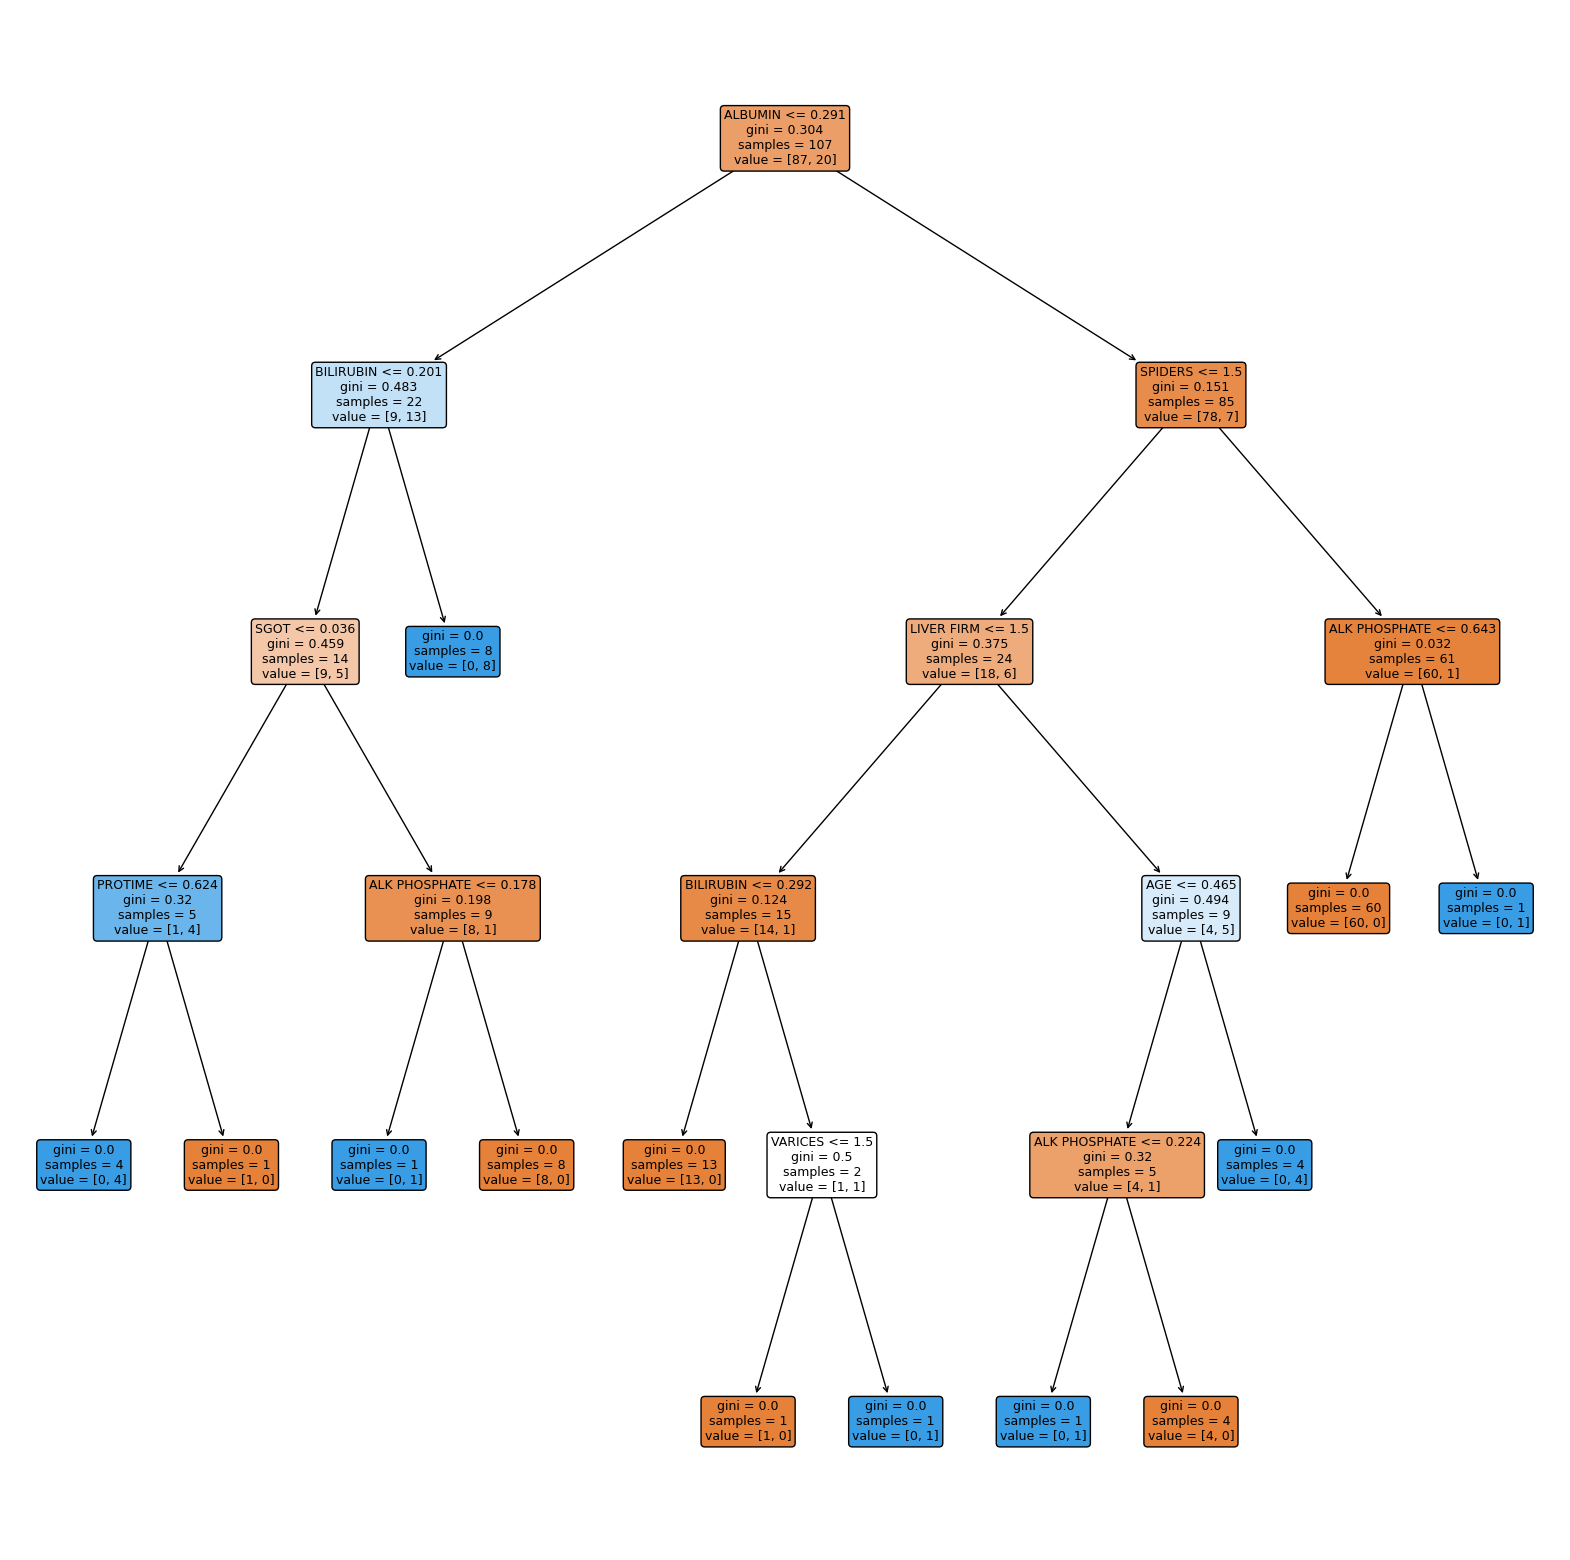

In [30]:
plt.figure(figsize = (20,20))
plot_tree(dt,filled = True, feature_names = X.columns, rounded = True, fontsize = 9)
plt.show()

Decision trees provide a clear and interpretable model structure. The tree structure shows the decision-making process, which is easy to visualize and understand.<br>

You can see the hierarchy of decisions made based on feature values, which helps in understanding the importance of different features.

#   - Make predictions on the testing set.
   # - Evaluate the model using the following metrics:
   #    - Confusion Matrix
   #    - Precision
   #    - Recall
   #    - F1 Score
   #    - AUC-ROC Score

In [31]:
#prediction
y_predicted = dt.predict(X_test)

In [32]:
import sklearn.metrics as mt

In [33]:
#Confusion Matrix
matrix = mt.confusion_matrix(y_test,y_predicted)

<Axes: >

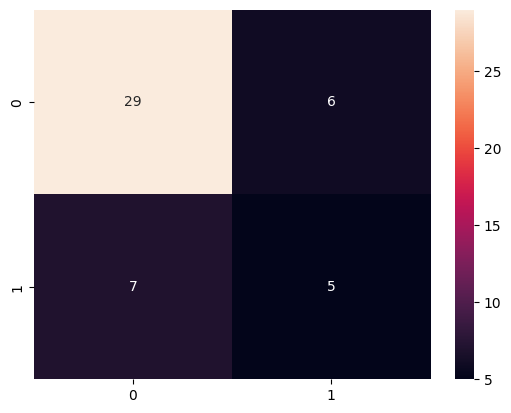

In [35]:
sns.heatmap(matrix,annot = True)

Correlation: Heatmaps are commonly used to visualize correlations between variables in a dataset. Higher correlations are often represented by darker colors, while lower correlations are represented by lighter colors.<br>

Frequency or Density: Heatmaps can also display the density or frequency of occurrences. In this case, cells with higher values are represented with darker colors, indicating higher density or frequency.<br>

Comparison: Heatmaps are useful for comparing different categories or variables across two dimensions.<br>

Annotations can be added to each cell in the heatmap to display the actual numerical value. This helps in providing additional context and precise information about each data point.<br>

Heatmaps allow for quick identification of patterns and trends within large datasets.
They are particularly effective in identifying clusters, outliers, and areas of high or low concentration.

In [36]:
#Precision
mt.precision_score(y_test,y_predicted)

0.45454545454545453

In [37]:
#Recall
mt.recall_score(y_test,y_predicted)

0.4166666666666667

In [38]:
#F1
mt.f1_score(y_test,y_predicted)

0.43478260869565216

In [39]:
#ROC_AUC
mt.roc_auc_score(y_test,y_predicted)

0.6226190476190476

In [40]:
#ROC Curve
mt.roc_curve(y_test,y_predicted)

(array([0.        , 0.17142857, 1.        ]),
 array([0.        , 0.41666667, 1.        ]),
 array([2, 1, 0]))

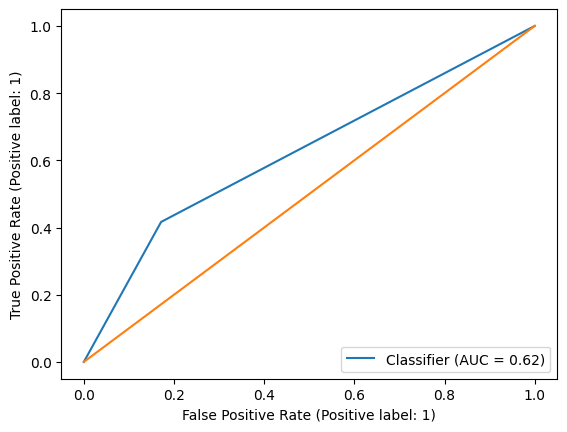

In [41]:
mt.RocCurveDisplay.from_predictions(y_test, y_predicted)
plt.plot([0,1],[0,1])

In [42]:
print(mt.classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        35
           1       0.45      0.42      0.43        12

    accuracy                           0.72        47
   macro avg       0.63      0.62      0.63        47
weighted avg       0.72      0.72      0.72        47



#From the above classification report,
# -We can observe that for class 0, the precision, recall, f1-score is
#  above 80% which means the above ml model can predict 0 classes with high accuracy
# -We can observe that for class 1, the precision, recall, f1-score is
#  somewhere close to 50% most of the time
#  which means the above ml model can predict 1 classes with very low accuracy
# -The ROC-Curve index is around 70% which is acceptable but has room for improvements
#-- The low prediction accuracy of class 1 probably because of the imbalance of
#   no of 0s and 1s in the dataset as we can see from the support score.
#   The dataset contains 35 0s and only 12 1s. So the imbalance is pretty significant

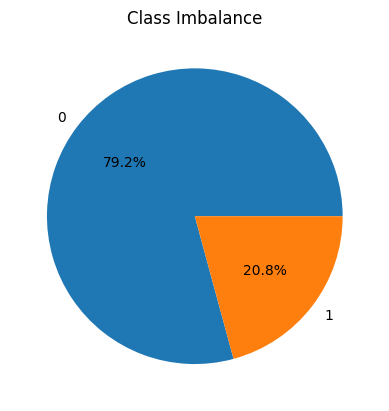

In [43]:
# Get pie chart slice labels
pie_chart_slice_labels = df['Class'].value_counts().index.to_numpy()

# Get pie chart slice values
pie_chart_slice_values = df['Class'].value_counts().to_numpy()

# Create a pie chart of the number of customers for each country origin
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")
plt.title("Class Imbalance")
plt.show()